# Natural Language Processing On Books 1

10 books from each of the below genres were cleaned and preprocessed into .txt files.
* Romance
* Mystery
* Thriller
* Horror
* Scifi
* Fantasy

The aim of this notebook is to:
1. Read in the data to a dataframe.
2. Create word clouds for each book.
3. Create a document term matrix.
4. Investigate differences such as the length of the vocab according to book and genre, vocab by publication date.

*This was inspired by Alice Zhao's talk title "Natural Language Processing in Python" featured at PyOhio 2018.*

In [15]:
import glob
import pandas as pd
import numpy as np
import nltk
import re
import string
from textblob import TextBlob, Word, Blobber
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib.lines import Line2D
import matplotlib

In [16]:
#Read Data, Place into dataframe
data={}
for book_file in glob.glob('All_Books/*'):
    
    book_info=book_file.split("\\")[1].split("_")
    book_name=book_info[0]
    book_author=book_info[1]
    book_year=book_info[2]
    book_genre=book_info[3].split(".")[0]
    
    f = open(book_file, "r" , encoding="utf8")
    full_book=f.read()
    
    book = {'book_author': book_author, 'book_year': book_year, 'book_genre':book_genre, 'book_string':full_book }
    data[book_name] = book

In [17]:
df = pd.DataFrame(data)
df=df.transpose()

In [18]:
df.head(5)

book_author book_genre  \
A Game of Thrones          George R R Martin    Fantasy   
A Knight in Shining Armor      Jude Deveraux    Romance   
A Time to Kill                  John Grisham   Thriller   
After Forever Ends            Melodie Ramone    Romance   
And Then There Were None     Agatha Christie    Mystery   

                                                                 book_string  \
A Game of Thrones          “We should start back,” Gared urged as the woo...   
A Knight in Shining Armor  \nENGLAND\n1564\nNicholas was trying to concen...   
A Time to Kill             Billy Ray Cobb was the younger and smaller of ...   
After Forever Ends         \n“Gran?”\n\nI can hear Kitty’s voice from the...   
And Then There Were None   In the corner of a first-class smoking carriag...   

                          book_year  
A Game of Thrones              1996  
A Knight in Shining Armor      1989  
A Time to Kill                 1989  
After Forever Ends             2012  
And Then There Were None       1939

In [19]:
def clean_text_round1(text):
    '''remove lowercase, text in square brackets, punctuation, words containing numbers.'''
    text = text.lower()
    text = text.replace('\u201c','"')
    text = text.replace('\u201d','"')
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("/[^A-Za-z0-9 ]/", '',text);
    return text

round1 = lambda x: clean_text_round1(x)

In [20]:
df.book_string=df.book_string.apply(round1)

In [21]:
df.head(5)

book_author book_genre  \
A Game of Thrones          George R R Martin    Fantasy   
A Knight in Shining Armor      Jude Deveraux    Romance   
A Time to Kill                  John Grisham   Thriller   
After Forever Ends            Melodie Ramone    Romance   
And Then There Were None     Agatha Christie    Mystery   

                                                                 book_string  \
A Game of Thrones          we should start back gared urged as the woods ...   
A Knight in Shining Armor  \nengland\n\nnicholas was trying to concentrat...   
A Time to Kill             billy ray cobb was the younger and smaller of ...   
After Forever Ends         \ngran\n\ni can hear kitty’s voice from the ba...   
And Then There Were None   in the corner of a firstclass smoking carriage...   

                          book_year  
A Game of Thrones              1996  
A Knight in Shining Armor      1989  
A Time to Kill                 1989  
After Forever Ends             2012  
And Then There Were None       1939

In [22]:
cv = CountVectorizer(stop_words='english')
df_cv = cv.fit_transform(df.book_string)
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_dtm.index = df.index
df_dtm=df_dtm.transpose()

In [23]:
# Find the top 30 words said by each book
top_dict = {}
for c in df_dtm.columns:
    top = df_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [24]:
# Print the top 15 words said by each book
for book, top_words in top_dict.items():
    print(book)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

A Game of Thrones
said, lord, ser, jon, ned, man, king, did, father, tyrion, like, hand, men, eyes
---
A Knight in Shining Armor
dougless, nicholas, said, looked, man, thought, woman, time, didn, did, like, robert, asked, room
---
A Time to Kill
jake, said, carl, lee, dont, asked, jury, know, buckley, just, mr, im, trial, ozzie
---
After Forever Ends
oliver, like, just, alexander, know, time, ll, said, love, don, did, right, told, didn
---
And Then There Were None
said, lombard, blore, vera, armstrong, rogers, mr, know, went, little, brent, island, think, got
---
Assasin's Apprentice
burrich, did, said, man, time, like, know, verity, chade, boy, king, think, eyes, way
---
Dracula
said, shall, know, time, come, van, helsing, lucy, came, went, did, like, man, mina
---
Dune
said, paul, jessica, thought, baron, duke, man, fremen, asked, stilgar, hawat, know, mother, eyes
---
Foundations
said, seldon, dors, dont, know, hummin, did, im, like, hari, way, time, think, just
---
Gardens of the M

In [25]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each book
words = []
for book in df_dtm.columns:
    top = [word for (word, count) in top_dict[book]]
    for t in top:
        words.append(t)
        
words

['said',
 'lord',
 'ser',
 'jon',
 'ned',
 'man',
 'king',
 'did',
 'father',
 'tyrion',
 'like',
 'hand',
 'men',
 'eyes',
 'bran',
 'told',
 'catelyn',
 'arya',
 'face',
 'boy',
 'brother',
 'know',
 'sansa',
 'dany',
 'robb',
 'old',
 'looked',
 'robert',
 'stark',
 'time',
 'dougless',
 'nicholas',
 'said',
 'looked',
 'man',
 'thought',
 'woman',
 'time',
 'didn',
 'did',
 'like',
 'robert',
 'asked',
 'room',
 'lady',
 'just',
 'know',
 'eyes',
 'went',
 'away',
 'left',
 'look',
 'll',
 'knew',
 'kit',
 'love',
 'little',
 'margaret',
 'don',
 'hand',
 'jake',
 'said',
 'carl',
 'lee',
 'dont',
 'asked',
 'jury',
 'know',
 'buckley',
 'just',
 'mr',
 'im',
 'trial',
 'ozzie',
 'good',
 'did',
 'like',
 'noose',
 'hes',
 'got',
 'lucien',
 'case',
 'yes',
 'time',
 'hailey',
 'county',
 'thats',
 'door',
 'black',
 'think',
 'oliver',
 'like',
 'just',
 'alexander',
 'know',
 'time',
 'll',
 'said',
 'love',
 'don',
 'did',
 'right',
 'told',
 'didn',
 'lucy',
 'alex',
 'looked',

In [26]:
Counter(words).most_common()

[('said', 59),
 ('know', 58),
 ('like', 54),
 ('did', 53),
 ('time', 53),
 ('just', 42),
 ('looked', 38),
 ('man', 36),
 ('eyes', 34),
 ('think', 34),
 ('way', 31),
 ('thought', 28),
 ('right', 27),
 ('face', 26),
 ('come', 25),
 ('hand', 23),
 ('away', 23),
 ('little', 23),
 ('don', 23),
 ('came', 23),
 ('went', 20),
 ('dont', 20),
 ('got', 20),
 ('head', 20),
 ('say', 19),
 ('asked', 17),
 ('im', 17),
 ('room', 15),
 ('ll', 15),
 ('door', 15),
 ('want', 15),
 ('going', 15),
 ('old', 14),
 ('good', 14),
 ('yes', 14),
 ('long', 14),
 ('didn', 11),
 ('mr', 11),
 ('turned', 11),
 ('father', 10),
 ('knew', 10),
 ('took', 10),
 ('house', 10),
 ('told', 9),
 ('day', 9),
 ('saw', 9),
 ('didnt', 9),
 ('left', 8),
 ('thats', 8),
 ('ve', 8),
 ('felt', 8),
 ('tell', 8),
 ('men', 7),
 ('look', 7),
 ('sir', 7),
 ('voice', 7),
 ('night', 7),
 ('mrs', 7),
 ('boy', 6),
 ('oh', 6),
 ('miss', 6),
 ('people', 6),
 ('king', 5),
 ('woman', 5),
 ('love', 5),
 ('shall', 5),
 ('great', 5),
 ('youre', 5),
 ('

In [27]:
# If more than 1/3 of the books have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 20]
add_stop_words.extend(['jon','ned','tyrion','dougless','nicholas','robert','ozzie','buckley','carl','lee','jake','oliver','alexander','lombard','blore','vera','armstrong','rogers','brent','van','helsing','lucy','mina','burrich','verity','chade','jessica','fremen','stilgar','hawat','don','duke','baron','seldon','dors','hummin','hari','paran','kruppe','crokus','tattersail','baruk','amy','nick','scarlett','kassad','barrett','fischer','florence','edith','ashley','rhett','melanie','hyperion','johnny','rachel','claudia','lestat','jane','kate','sampson','naomi','dain','jessica','trent','vawtry','jimmy','sean','dave','whitey','katie','molly','maelcum','armitage','jamie','elizabeth','darcy','bennet','bingley','jane','henrik','gunslinger','henry','holmes','stapleton','charles','maxim','frank','rosemary','roman','hutch','minnie','castevet','halloway','jim','george','kathy','mancuso','missy','garion','pol','barak','durnik','dorcas','jason','bourne','carlos','cain','rincewind','twoflower','hrun','monte','count','cristo','villefort','danglars','christopher','teabing','langdon','sophie','lebel','jackal','shevek','takver','chris','karras','regan','gandalf','frodo','sam','bilbo','blomkvist','vanger','salander','martin','harriet','theodora','house','hill','cort','megan','spade','susan','peter','lucy','edmund','aslan','molly','schmendrick','ryan','ramius','watson','jake','eleanor','luke','montague','baskerville','unicorn','tagomi','childan','baynes','juliana','joe','luna','mike','wyoh','allie','noah','dorian','henry','gray','harry','basil','frank','inigo','fezzik','buttercup','westley','danny','jack','wendy','hallorann','starling','lecter','crawford','leamas','mundt','fiedler','liz','peters','presteign','foyle','dagenham','gully','nomad','youre','kaladin','dalinar','shallan','jasnah','bridge','adolin','sadeas','percival','halcombe','fairlie','whitney','clayton','whitneys','paul','zakalwe','','laura','mrs','mr','dr','sma'])

In [28]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
df_cv = cv.fit_transform(df.book_string)
df_stop = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())
df_stop.index = df.index
df_dtm=df_stop

In [29]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

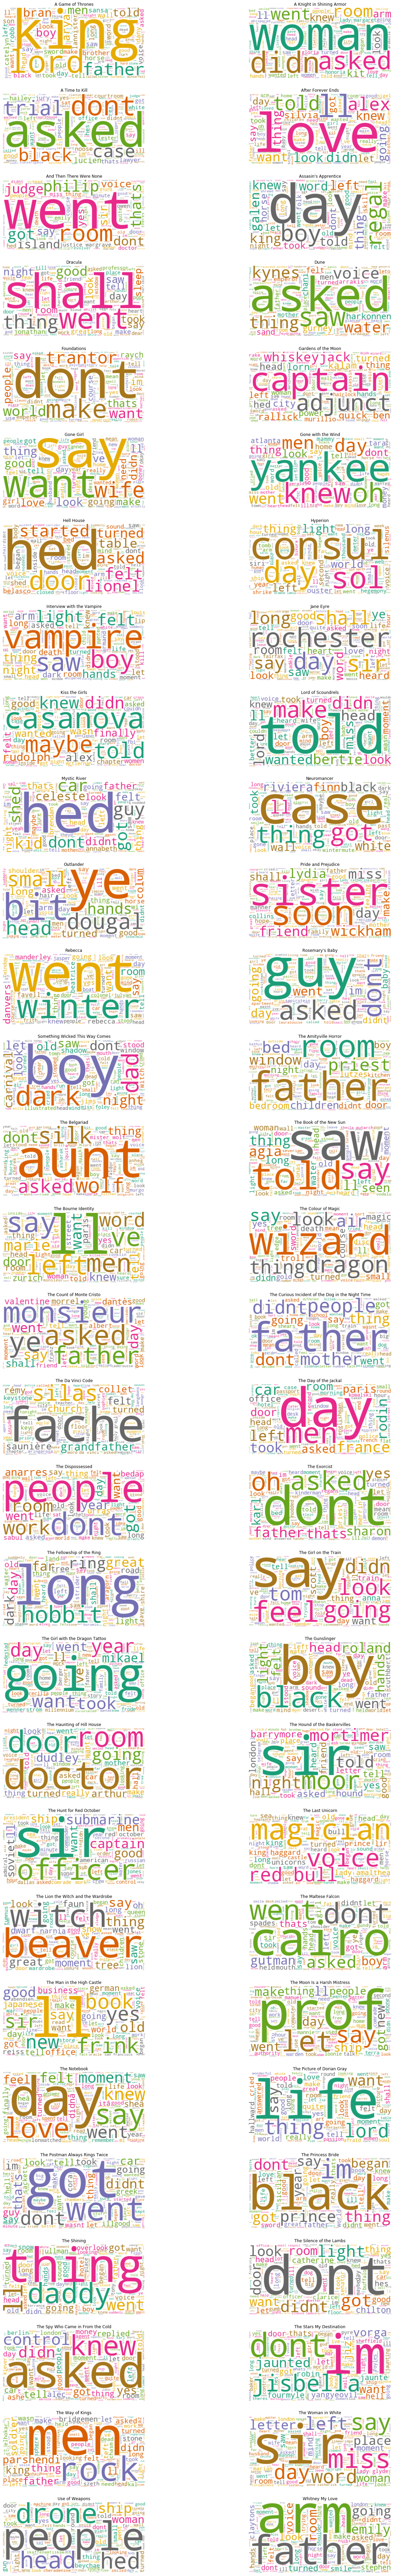

In [30]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [24, 140]

full_names = df.index.values.tolist()
# Create subplots for each book
for index, book in enumerate(df.index.values):
    #print(book)
    wc.generate(df.book_string[book])
    
    plt.subplot(30, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [31]:
# Find the number of unique words that each book uses
df_dtm=df_dtm.transpose()

In [32]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for book in full_names:
    uniques = df_dtm[book].nonzero()[0].size
    unique_list.append(uniques/len(df.loc[book].book_string.split()))

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['book', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')

In [33]:
color_map={'Fantasy':'cyan','Romance':'red','Thriller':'green','Mystery':'magenta','SciFi':'black','Horror':'grey'}
colors_unique=[color_map[df.loc[book].book_genre] for book in data_unique_sort['book']]

Text(0.5, 1.0, 'Unique Words / Words in Book')

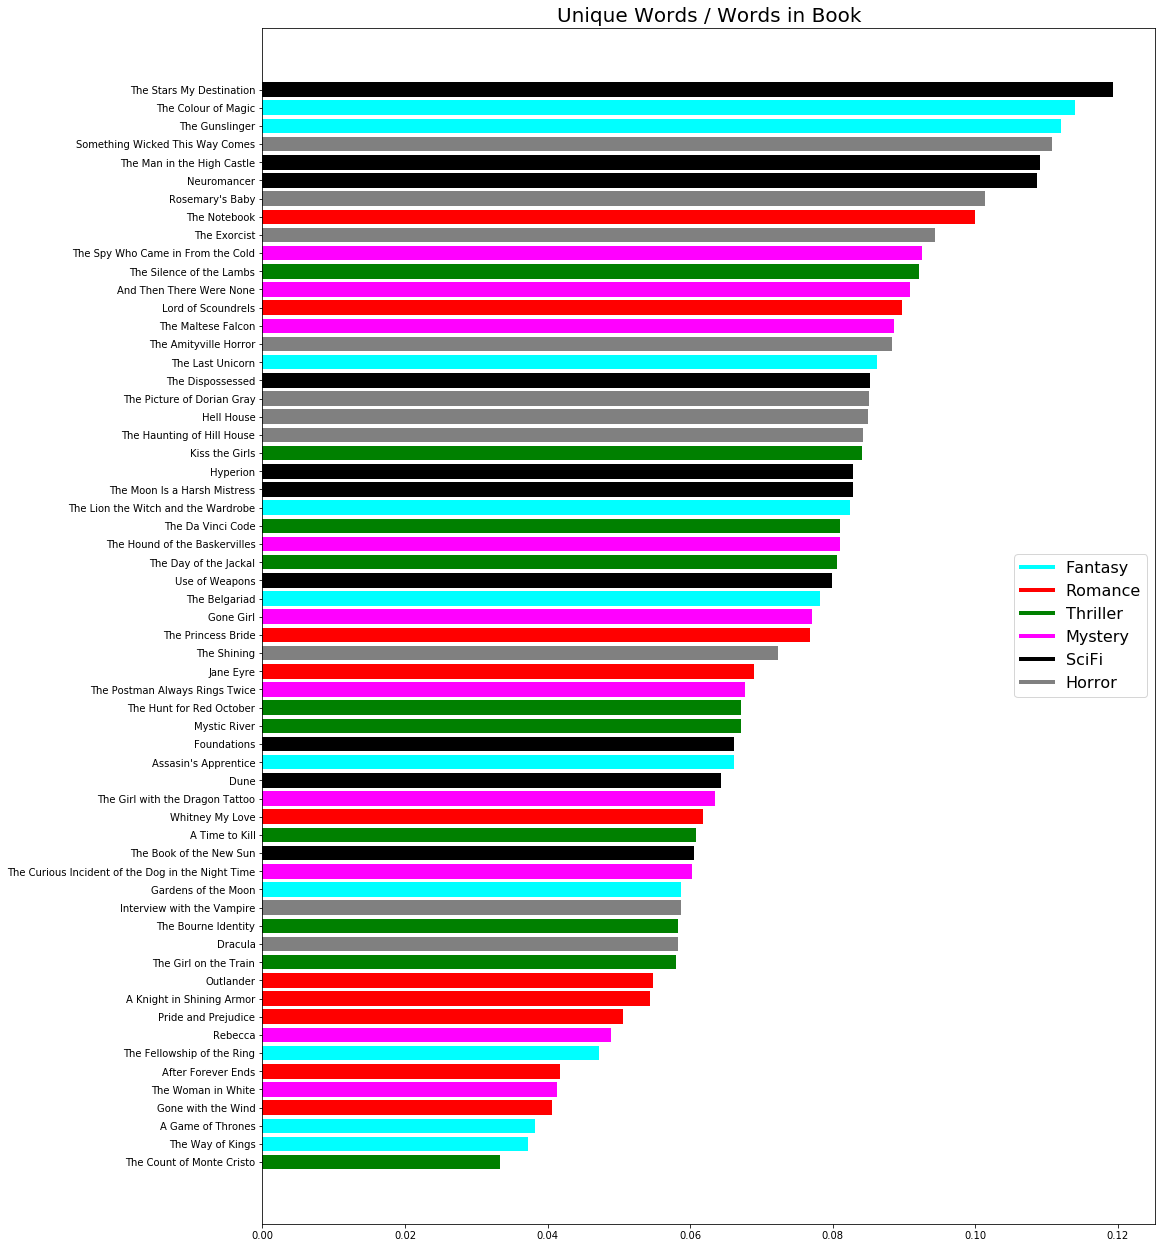

In [34]:
y_pos = np.arange(len(data_words))

plt.figure(figsize=(16,22))
plt.barh(y_pos, data_unique_sort.unique_words, align='center', color=colors_unique)
legend_elements = [Line2D([0], [0], color='cyan', lw=4, label='Fantasy'),
                   Line2D([0], [0], color='red', lw=4, label='Romance'),
                   Line2D([0], [0], color='green', lw=4, label='Thriller'),
                   Line2D([0], [0], color='magenta', lw=4, label='Mystery'),
                   Line2D([0], [0], color='black', lw=4, label='SciFi'),
                   Line2D([0], [0], color='grey', lw=4, label='Horror')]
plt.legend(handles=legend_elements, loc='right', prop={'size': 16})
                   
plt.yticks(y_pos, data_unique_sort.book)
plt.title('Unique Words / Words in Book', fontsize=20)

In [35]:
#Add Unique Words to dataframe
unique_words_per_word={}
for index, row in data_unique_sort.iterrows():
    unique_words_per_word[row['book']]= row['unique_words']
df['unique_words_per_word']=pd.Series(unique_words_per_word, index=df.index)

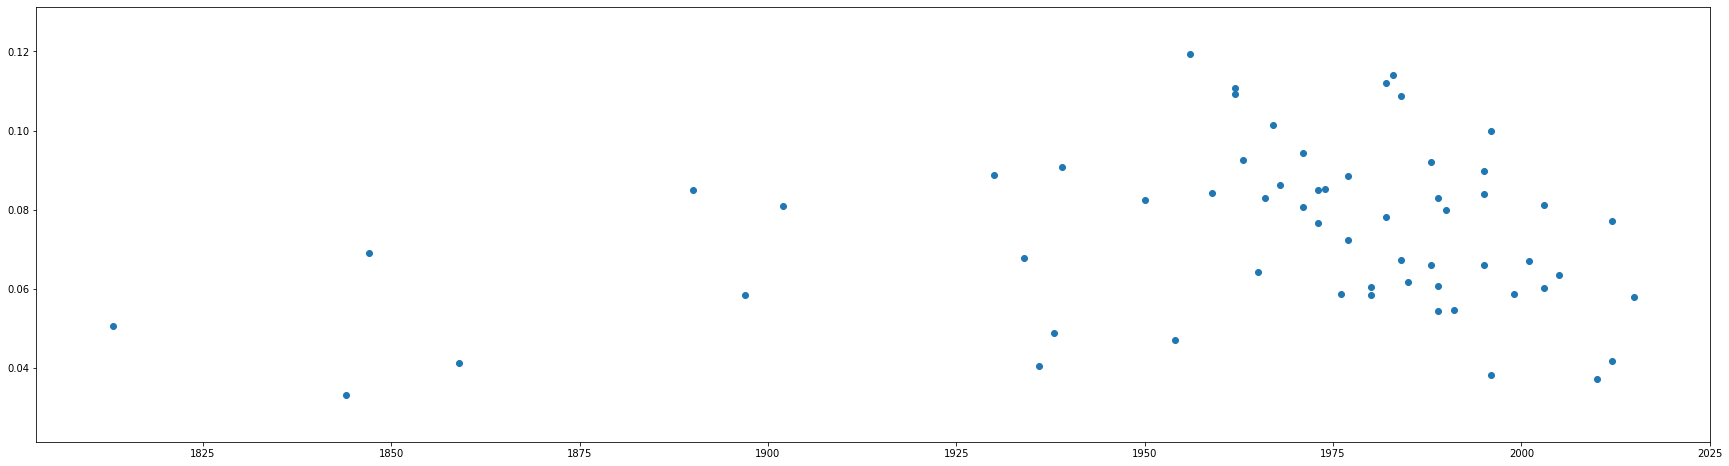

In [36]:
plt.figure(figsize=(30,8))
book_year=df.book_year
unique_words_per_word=df.unique_words_per_word
book_year, unique_words_per_word = zip(*sorted(zip(book_year, unique_words_per_word)))
#dates = matplotlib.dates.date2num(book_year)
plt.scatter([int(year) for year in book_year],unique_words_per_word) #convert to ints because book years are str

In [37]:
df.to_pickle("./books_dataframe.pkl")
#unpickled_df = pd.read_pickle("./dummy.pkl")